## <u>Part One - PROJECT BASED </u>

• <b>DOMAIN:</b> Smartphone, Electronics 

• <b>CONTEXT:</b> India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

• <b>DATA DESCRIPTION:</b> 
 
 . author : name of the person who gave the rating
 . country : country the person who gave the rating belongs to
 . data : date of the rating
 . domain: website from which the rating was taken from
 . extract: rating content
 . language: language in which the rating was given
 . product: name of the product/mobile phone for which the rating was given
 . score: average rating for the phone
 . score_max: highest rating given for the phone
 . source: source from where the rating was taken

• <b>PROJECT OBJECTIVE:</b> We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

<b>Steps and tasks: </b>

<b>1.Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.</b>

• Merge the provided CSVs into one data-frame.<br> 
• Check a few observations and shape of the data-frame.<br> 
• Round off scores to the nearest integers.<br> 
• Check for missing values. Impute the missing values if there is any.<br> 
• Check for duplicate values and remove them if there is any.<br> 
• Keep only 1000000 data samples. Use random state=612.<br> 
• Drop irrelevant features. Keep features like Author, Product, and Score.<br> 


<b>2.Answer the following questions</b>

• Identify the most rated features.<br> 
• Identify the users with most number of reviews.<br> 
• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset.<br> 

<b>3.Build a popularity based model and recommend top 5 mobile phones.</b>

<b>4.Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you
can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You
can try both user-based and item-based model.</b>


<b>5.Evaluate the collaborative model. Print RMSE value.</b>



<b>6.Predict score (average rating) for test users.</b>

<b>7.Report your findings and inferences.</b>

<b>8.Try and recommend top 5 products for test users.</b>

<b>9. Try cross validation techniques to get better results.</b>

<b>10. In what business scenario you should use popularity based Recommendation Systems ?</b>

<b>11. In what business scenario you should use CF based Recommendation Systems ?</b>

<b>12. What other possible methods can you think of which can further improve the recommendation for different users ?</b>

<br><br>

### <u>Solution</u>

### Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps:

In [1]:
#impot libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from collections import defaultdict
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the datasets
review1 = pd.read_csv('phone_user_review_file_1.csv', encoding='iso-8859-1')
review2 = pd.read_csv('phone_user_review_file_2.csv', encoding='iso-8859-1')
review3 = pd.read_csv('phone_user_review_file_3.csv', encoding='iso-8859-1')
review4 = pd.read_csv('phone_user_review_file_4.csv', encoding='iso-8859-1')
review5 = pd.read_csv('phone_user_review_file_5.csv', encoding='iso-8859-1')
review6 = pd.read_csv('phone_user_review_file_6.csv', encoding='iso-8859-1')

In [3]:
review1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
review2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
review3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [6]:
review4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [7]:
review5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [8]:
review6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [9]:
#From above we can see the three datasets are having same columns so we can merge into one. 
phone_rev = pd.concat([review1,review2,review3,review4,review5,review6],ignore_index=True)


In [10]:
phone_rev.sample(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
578742,/cellphones/sony-xperia-z1/,7/25/2014,de,de,Amazon,amazon.de,10.0,10.0,"Mir war wichtig mal wieder ein Handy zu haben,...",T.Stable,"Sony Xperia Z1 Smartphone (5 Zoll (12,7 cm) To..."
1270459,/cellphones/htc-touch-diamond/,1/10/2008,de,de,Inside-handy,inside-handy.de,9.0,10.0,(in meinen Augen) Ich habe das gerÃ¤t seit 2 M...,Sertac,HTC Touch Diamond
890657,/cellphones/htc-radar/,23/1/2012,en,us,Amazon,amazon.com,2.0,10.0,really awful delivery,Pasha,"HTC Radar, White 8GB (T-Mobile)"
1179327,/cellphones/samsung-flight/,12/30/2009,en,us,Amazon,amazon.com,10.0,10.0,Product was as advertised!,Spartacus,Samsung Flight II A927 GSM 3G Touchscreen / QW...
614148,/cellphones/samsung-galaxy-mega-6-3-i9200/,7/7/2013,fr,fr,Amazon,amazon.fr,10.0,10.0,"trÃ¨s bon appareil, personnellement c'est la g...",thiel gregory,Samsung Galaxy Mega 6.3 Smartphone 4G Bluetoot...


In [11]:
#Checking the size and shpae of the df
print(phone_rev.shape)
print(phone_rev.size)

(1415133, 11)
15566463


There is 1415133 columns in the df, which is high.

In [12]:
phone_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


We can observe a large number of null values in score,score_max,extract,author,product columns. Here date column is of object type but should be in dat type.

In [13]:
#Since there is null values lets check for the percentage of null values in each column.
null_rev = phone_rev.isnull().sum()
null_perc = ((null_rev*100)/phone_rev.shape[0]).round(2)
print(null_perc.astype('str')+ '%' )

phone_url     0.0%
date          0.0%
lang          0.0%
country       0.0%
source        0.0%
domain        0.0%
score        4.49%
score_max    4.49%
extract      1.37%
author       4.47%
product       0.0%
dtype: object


We can see score and score_max have same amount of null values. feature product have 0% of null value eventhough it have 1 null value.

In [14]:
#Lets look for unique values in the df
phone_rev.nunique()

phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64

we can observe the data is from 22 languages and 42 countries. Even the extracts are not same. score_max feature has only one unique value that is 10.

In [15]:
#Lets look at some features
phone_rev.author.value_counts(ascending=False).head(10)

Amazon Customer    76978
Cliente Amazon     19304
e-bit               8663
Client d'Amazon     7716
Amazon Kunde        4750
Anonymous           2750
einer Kundin        2610
einem Kunden        1898
unknown             1738
Anonymous           1461
Name: author, dtype: int64

From above we can see the most users are Amazon Customer. Since the data consist is of 22 languages, other values like Cliente Amazon, Client d'Amazon, Amazon Kunde etc would be same as Amazon Customer. We need to look into further. Since problems can arise due to language, we can look for non english items.


In [16]:
phone_rev[phone_rev['lang']!='en']['product'].value_counts(ascending=False).head(15)

Huawei P8lite zwart / 16 GB                                                                                                                                                                  2707
Samsung Galaxy Express I8730                                                                                                                                                                 2686
Samsung Galaxy S6 zwart / 32 GB                                                                                                                                                              2345
Nokia 5800 XpressMusic                                                                                                                                                                       1996
Nokia N95                                                                                                                                                                                    1848
Huawei P9 Lite Smartphone, LTE

From above we can observe that the same phone is listed in different names, some are only different in their colours. But our objective is only to recommend product brand not the exact colour.So since our dataset doesn't consist of any product id we need some unique identity for each product. Lets look into feature phone_url

In [17]:
phone_rev['phone_url'].value_counts(ascending=False).head(10)

/cellphones/samsung-galaxy-s-iii/         17093
/cellphones/apple-iphone-5s/              16379
/cellphones/samsung-galaxy-s6/            16145
/cellphones/samsung-galaxy-s5/            16082
/cellphones/samsung-galaxy-s7-edge/       15917
/cellphones/motorola-moto-g/              14476
/cellphones/samsung-galaxy-s7-789999/     13488
/cellphones/samsung-i9500-galaxy-s-iv/    13161
/cellphones/huawei-p8-lite/               12629
/cellphones/lenovo-vibe-k4-note/           9662
Name: phone_url, dtype: int64

In [18]:
#From above we can see a pattern or each product is clearly defined. Lets confirm further by comparing with the product names given

phone_rev[phone_rev['phone_url']=='/cellphones/samsung-galaxy-s-iii/']['product'].value_counts(ascending=False).head(10)

Samsung Galaxy Express I8730                                                                                                                        2685
Samsung Galaxy S III 16GB (Virgin Mobile)                                                                                                            730
Samsung Galaxy S III                                                                                                                                 689
Samsung Galaxy S III 16GB (Straight Talk)                                                                                                            556
Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz     381
Samsung Galaxy S III 16GB (Boost Mobile)                                                                                                             350
Samsung Galaxy S3 I535 16GB Verizon Wireless 4G LTE Smartphone - Blue             

As we said earlier we can clearly observe. The phone model can be gained from the url itself for the sake of identification. Feature product contains the same product with different colours or some other small changes wich is negligible. So we need to extract the model name.

In [19]:
#We are extracting the model name from the url, every url contains the name at the 3rd part of the url. We use that as criteria to extarct.
phone_rev['model'] = phone_rev['phone_url'].str.split("/").apply(lambda col : col[2]).replace('-',' ',regex=True)
phone_rev.sample(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,model
137597,/cellphones/samsung-galaxy-j3-duos/,7/1/2016,fr,fr,Orange,boutiquepro.orange.fr,7.7,10.0,pas trop compliquÃ© a utiliser,pekita08,Samsung Galaxy J3 2016 noir 8Go,samsung galaxy j3 duos
1181813,/cellphones/nokia-e51/,8/23/2009,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð¢ÑÐµÑÐ½ÑÐ»Ð° ÑÑÐµÐºÐ»Ð¾ ÐºÐ°Ð¼ÐµÑÑ Ð¿Ð...,anpodin,Nokia E51,nokia e51
926514,/cellphones/samsung-s5610/,9/18/2013,ru,ru,Yandex,market.yandex.ru,10.0,10.0,ÐÐ¾Ð»Ð³Ð¾ Ð¸ÑÐºÐ°Ð» ÐºÐ°ÐºÐ¾Ð¹ ÐºÑÐ¿Ð¸ÑÑ ...,ÐÐ°ÑÐ¸Ð»ÑÐµÐ²Ð¸Ñ Ð¡ÐµÑÐ³ÐµÐ¹,Samsung S5610,samsung s5610
291215,/cellphones/samsung-galaxy-note-4/,2/8/2015,de,de,Amazon,amazon.de,10.0,10.0,Das Phone habe ich jetzt seit einigen Tagen un...,Kumpel 2013,"Samsung Galaxy Note Edge Smartphone (5,6 Zoll ...",samsung galaxy note 4
19678,/cellphones/samsung-galaxy-s7-edge/,5/29/2016,nl,be,KIESKEURIG,kieskeurig.be,8.4,10.0,Heel erg tevreden met de smartphone. Alles wer...,Yvonne,Samsung Galaxy S7 Edge goud / 32 GB,samsung galaxy s7 edge
93502,/cellphones/samsung-galaxy-j5-4g-lte-5-2-inches/,3/28/2017,nl,nl,Wehkamp,wehkamp.nl,10.0,10.0,Wat ze al zeggen in de beoordeling en reviews ...,schreef,Samsung Galaxy J5 (2016),samsung galaxy j5 4g lte 5 2 inches
355457,/cellphones/samsung-galaxy-s5/,3/24/2014,tr,tr,Bimeks,bimeks.com.tr,10.0,10.0,iyi bir Ã¼rÃ¼ne benziyor,aga,Samsung G900F 16GB Galaxy S5 Black,samsung galaxy s5
686207,/cellphones/sony-xperia-l/,8/26/2013,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,10.0,10.0,ÑÐµÐºÐ¾Ð¼ÐµÐ½Ð´ÑÑ ÑÑÑ Ð¸Ð³ÑÑÑÐºÑ Ð´Ð...,Ð¯Ð½Ð¸Ð½Ð°,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹),sony xperia l
412081,/cellphones/acer-liquid-z530/,2/5/2016,es,es,Amazon,amazon.es,8.0,10.0,Para la elecciÃ³n tuve en cuenta los comentari...,senderista,Acer Liquid Z530 8GB Negro - Smartphone (SIM d...,acer liquid z530
1072959,/cellphones/apple-iphone-3gs/,5/18/2011,sv,se,Prisjakt,prisjakt.nu,10.0,10.0,Kvalitet nÃ¤r den Ã¤r som bÃ¤st,Tor_bjorn,Apple iPhone 3GS 32GB,apple iphone 3gs


We have added new column with model name.

In [20]:
#Now lets look at authors of different reviews
phone_rev['author'].value_counts(dropna=False).head(20)

Amazon Customer       76978
NaN                   63202
Cliente Amazon        19304
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
Anonymous              2750
einer Kundin           2610
einem Kunden           1898
unknown                1738
Anonymous              1461
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
ZÃ¡kaznÃ­k              898
Marco                   866
Alex                    861
ÐÐ¼Ð¸ÑÑÐ¸Ð¹          849
Andrea                  822
ÐÐ½Ð´ÑÐµÐ¹            779
Name: author, dtype: int64

From above we can see that Amazon Customer is the has the highest number of reviews. It also includes NaN values,that too in a huge number. Also we can see that as we mentioned earlier due to language barrier there must be different names depicting the same meaning. We can also observe there are authors named as unknown & Anonymous, we dont know the name of these authors just like NaN.So we can replace NaN with either of these values or cluster and remove it.


In [21]:
#Clustering values that depict same meaning Unkown Customer
UC = ['Anonymous','Anonymous ','einer Kundin','einem Kunden','unknown']
phone_rev['author'].replace(to_replace=UC,value='Anonymous',inplace=True) #Clustering to 'Unknown'

In [22]:
phone_rev['author'].value_counts(dropna=False).head(20)

Amazon Customer       76978
NaN                   63202
Cliente Amazon        19304
Anonymous             10457
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
ZÃ¡kaznÃ­k              898
Marco                   866
Alex                    861
ÐÐ¼Ð¸ÑÑÐ¸Ð¹          849
Andrea                  822
ÐÐ½Ð´ÑÐµÐ¹            779
Daniel                  733
ÐÐ»ÐµÐºÑÐµÐ¹          732
Chris                   689
Antonio                 648
Name: author, dtype: int64

Now lets check the score feature.

In [23]:
phone_rev.score.unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

We can see there are many decimal values, we can round it of to the nearest integer.

In [24]:
phone_rev['score'] = phone_rev['score'].round(0).astype('Int64')
phone_rev.score.unique() #Cheking unique values after rounding off

<IntegerArray>
[10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]
Length: 12, dtype: Int64

In [25]:
#Lets impute missing values of score feature, rest of the features are less important, we have already imputed author column

phone_rev['score'] = phone_rev['score'].fillna(phone_rev['score'].median())
phone_rev.score.isna().sum()



0

In [26]:
phone_rev.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author       63202
product          1
model            0
dtype: int64

In [27]:
#From above we can see there is still null values present so need to deal it
phone_rev.dropna(inplace=True)
phone_rev = phone_rev[phone_rev['author'] != 'Anonymous'] #There is no use with anonymous authors so removing it.
phone_rev.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
model        0
dtype: int64

In [28]:
phone_rev.author.value_counts().head(10)

Amazon Customer       76978
Cliente Amazon        19304
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
David                   968
ZÃ¡kaznÃ­k              898
Marco                   848
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ      841
Alex                    834
Name: author, dtype: int64

We have removed all the null values from the data

In [29]:
#Lets look for duplicate values
print(phone_rev.duplicated().sum())
phone_rev.drop_duplicates(inplace=True) 

4472


In [30]:
#After removing duplicates
phone_rev.duplicated().sum()

0

In [31]:
#Dropping irrelevant features.
fe = ['author','product','score']
phone_rev['product'] = phone_rev['model']
phone_rev = phone_rev.loc[:,fe] 
phone_rev.head(10)

,author,product,score
0,CarolAnn35,samsung galaxy s8,10
1,james0923,samsung galaxy s8,10
2,R. Craig,samsung galaxy s8,6
3,Buster2020,samsung galaxy s8,9
4,S Ate Mine,samsung galaxy s8,4
5,BDB76,samsung galaxy s8,10
6,KLC30306,samsung galaxy s8,4
7,Mnhy,samsung galaxy s8,6
8,Mr Alan,samsung galaxy s8,6
9,Raven Wolf Song,samsung galaxy s8,8


In [32]:
#Shape after cleaning
phone_rev.shape

(1261137, 3)

In [33]:
#Lets take 1000000 samples 
sample_phone = phone_rev.sample(n=1000000, random_state=612)
sample_phone.shape #Shape after sampling

(1000000, 3)

### 2.Answer the following questions:

**Identify the most rated features.**

In [34]:
#The most number of times rated product
print('Most Rated Feature : \n\n\n',sample_phone['product'].value_counts().head())

Most Rated Feature : 


 samsung galaxy s6         12380
apple iphone 5s           12066
samsung galaxy s5         11920
motorola moto g           11371
samsung galaxy s7 edge    11261
Name: product, dtype: int64


<AxesSubplot:xlabel='score', ylabel='count'>

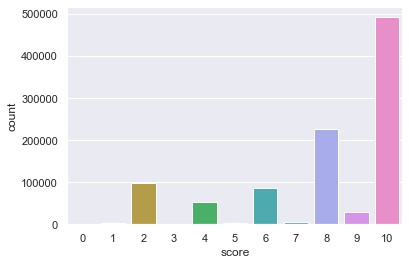

In [35]:
#Most given score
sns.countplot(data=sample_phone,x='score')

**Identify the users with most number of reviews**

In [36]:
#Authors with most reviews
print('Most contributed Authors : \n\n\n',sample_phone['author'].value_counts().head())

Most contributed Authors : 


 Amazon Customer    61187
Cliente Amazon     15228
e-bit               6712
Client d'Amazon     6084
Amazon Kunde        3757
Name: author, dtype: int64


**Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset.**

In [37]:
#Finding authors with > 50 ratings
author_trim = sample_phone['author'].value_counts()
author_trim = author_trim[author_trim > 50].index.tolist() 
len(author_trim) #No of authors > 50

629

In [38]:
product_trim = sample_phone['product'].value_counts()
product_trim = product_trim[product_trim > 50].index.tolist() 
len(product_trim) #No of products > 50

2207

In [39]:
#Now lets combine

df1 = sample_phone[(sample_phone['author'].isin(author_trim)) & (sample_phone['product'].isin(product_trim)) ]
print('The final shape of the datset : \nRows = ',df1.shape[0],'\nColumns',df1.shape[1])

The final shape of the datset : 
Rows =  164916 
Columns 3


In [40]:
df1.head(10)

,author,product,score
1039377,ÐÐ¼Ð¸ÑÑÐ¸Ð¹,zte v880,10
191465,Amazon Customer,huawei honor 5x,10
502184,Amazon Customer,motorola moto g turbo edition,2
661006,Mario,samsung galaxy s4 mini gt i9190 gt i9192 dual sim,8
537898,Amazon Customer,apple iphone 5s,2
220025,Amazon Customer,asus zenfone 3 deluxe,8
76595,Amazon Customer,oneplus 3,10
221262,Cliente Amazon,meizu m2 note,8
1180816,Scott,samsung strive a687,8
718677,Amazon Customer,nokia lumia 520,8


### 3.Build a popularity based model and recommend top 5 mobile phones:

In [41]:
#We are using the top 50 datset
top5df = pd.DataFrame(df1.groupby('product')['score'].mean())
top5df['Rating_count'] = df1.groupby('product')['score'].count()
top5df = top5df.sort_values(by=['score','Rating_count'], ascending=[False,False])
print('Top 5 mobile phones recommended are: \n\n')
top5df.head()

Top 5 mobile phones recommended are: 




,score,Rating_count
product,,
nokia 5250,10.0,9
ericsson t28s,10.0,3
huawei ideos x5,10.0,3
inew v3,10.0,3
nokia 1209,10.0,3


### 4. Build a collaborative filtering model using SVD.Build a collaborative filtering model using kNNWithMeans from surprise:

**Using SVD**

In [42]:
df_cvd = Dataset.load_from_df(df1[['author','product','score']], Reader(rating_scale=(1,10)))
train, test = train_test_split(df_cvd,test_size =.25, random_state=612)

print('Top 3 values from trainset: \n\n')
for key, value in {k: v for k, v in train.ur.items() if k<=2}.items():print(key,'->',value,'\n')
    
print('\nTop 3 values from testset:', *test[0:3], sep ='\n\n')

Top 3 values from trainset: 


0 -> [(0, 6.0), (1, 10.0), (2, 10.0), (4, 8.0), (5, 4.0), (7, 2.0), (8, 10.0), (10, 10.0), (12, 4.0), (21, 2.0), (24, 10.0), (25, 6.0), (26, 4.0), (29, 10.0), (33, 10.0), (35, 10.0), (39, 2.0), (40, 10.0), (45, 10.0), (49, 6.0), (7, 6.0), (50, 2.0), (51, 8.0), (58, 10.0), (49, 6.0), (60, 10.0), (61, 8.0), (62, 10.0), (39, 10.0), (5, 8.0), (14, 10.0), (65, 10.0), (67, 10.0), (70, 10.0), (18, 10.0), (73, 8.0), (74, 2.0), (9, 10.0), (78, 10.0), (49, 10.0), (63, 2.0), (33, 10.0), (80, 4.0), (81, 4.0), (82, 10.0), (83, 2.0), (23, 10.0), (39, 10.0), (82, 8.0), (89, 2.0), (90, 2.0), (95, 2.0), (65, 6.0), (99, 8.0), (24, 6.0), (54, 10.0), (103, 10.0), (105, 10.0), (107, 2.0), (49, 10.0), (108, 8.0), (109, 10.0), (111, 2.0), (21, 8.0), (49, 10.0), (118, 8.0), (62, 10.0), (24, 10.0), (122, 2.0), (49, 2.0), (49, 8.0), (10, 10.0), (12, 8.0), (135, 2.0), (138, 6.0), (0, 10.0), (139, 2.0), (49, 6.0), (140, 10.0), (49, 6.0), (143, 10.0), (49, 8.0), (140, 8.0), (39, 10.0

In [43]:
#Now lets define some functions for future purposes
#Function to return top-n recommendations for each user.

def top_return(predictions, n=5):
    #Mapping the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    #Sorting the predictions and returning the highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [44]:
#Function to fit and predict using svd
def svd_func(train_s, test_s):
    svd = SVD(random_state=612)
    svd.fit(train_s)
    svd_pred = svd.test(test_s)
    return svd_pred, svd

In [45]:
# computing RMSE
svd_pred, svd = svd_func(train,test)
print('First few prediction values: \n',svd_pred[0:2])
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n') 
svd_rmse = round(accuracy.rmse(svd_pred),2)


First few prediction values: 
 [Prediction(uid='Cliente Amazon', iid='huawei p8 lite', r_ui=8.0, est=8.234675409707737, details={'was_impossible': False}), Prediction(uid='Amazon Customer', iid='oneplus 3t', r_ui=10.0, est=7.20037949955711, details={'was_impossible': False})]
RMSE: 2.8088

RMSE value(test-set):  2.81 

RMSE: 2.8088


**Using using kNNWithMeans (Item Based)**

In [46]:
%%time
#Defining function for knn

def knn_item(train_s, test_s):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train_s)
    knn_i_pred = knn_i.test(test_s)
    return knn_i_pred, knn_i
#Fiting and predicting by calling function
knn_i_pred, knn_i = knn_item(train, test)
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n') 
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Cliente Amazon', iid='huawei p8 lite', r_ui=8.0, est=8.44, details={'actual_k': 50, 'was_impossible': False}), Prediction(uid='Amazon Customer', iid='oneplus 3t', r_ui=10.0, est=8.08, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.8000

RMSE value(Item-based Model, test-set):  2.8 

RMSE: 2.8000
Wall time: 20min


**Using using kNNWithMeans (User Based)**

In [47]:
%%time
def knn_user(train_s, test_s):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train_s)
    knn_u_pred = knn_u.test(test_s)
    return knn_u_pred, knn_u
#Fiting and predicting by calling function
knn_u_pred, knn_u = knn_user(train, test)
print('First few prediction values: \n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n') 
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Cliente Amazon', iid='huawei p8 lite', r_ui=8.0, est=8.44, details={'actual_k': 50, 'was_impossible': False}), Prediction(uid='Amazon Customer', iid='oneplus 3t', r_ui=10.0, est=8.079999999999998, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.8034

RMSE value(User-based Model, test-set):  2.8 

RMSE: 2.8034
Wall time: 33.1 s


### 5:Evaluate the collaborative model. Print RMSE value:

<AxesSubplot:>

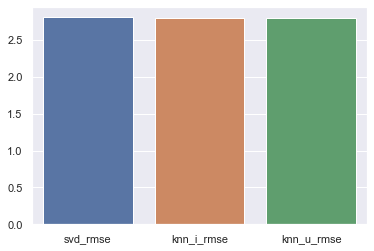

In [48]:
#Comparison of RMSE value using barplot
sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse])

### 6:Predict score (average rating) for test users:

In [49]:
#SVD
svd_pred_df = pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',svd_pred_df['est'].mean())
print('Average rating  by test users: ',svd_pred_df['rui'].mean())
print('Average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

Average prediction for test users:  7.705064958982232
Average rating  by test users:  7.75408086541027
Average prediction error for test users:  2.2458428578690333


In [50]:
#KNNWithMean ItemBased
knn_i_pred_df = pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',knn_i_pred_df['est'].mean())
print('Average rating  by test users: ',knn_i_pred_df['rui'].mean())
print('Average prediction error for test users: ',(knn_i_pred_df['rui']-knn_i_pred_df['est']).abs().mean())

Average prediction for test users:  7.727463846524764
Average rating  by test users:  7.75408086541027
Average prediction error for test users:  2.232185658692381


In [51]:
#KNNWithMean UserBased
knn_u_pred_df = pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('Average prediction for test users: ',knn_u_pred_df['est'].mean())
print('Average rating  by test users: ',knn_u_pred_df['rui'].mean())
print('Average prediction error for test users: ',(knn_u_pred_df['rui']-knn_u_pred_df['est']).abs().mean())

Average prediction for test users:  7.734561842469247
Average rating  by test users:  7.75408086541027
Average prediction error for test users:  2.2285594319635726


### 7.Report your findings and inferences:

From above findings all we can observe that:<br>
The Most Popular Phone : nokia 5250<br>
As we have mentioned earlier due to different language proper data cannot be drafted. This results in skewness in many features. Most of the authors have given rating 8 or 10



### 8. Try and recommend top 5 products for test users:

In [52]:
top_5 = top_return(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Cliente Amazon ->  [('xiaomi redmi 3', 10), ('huawei ascend g730', 10), ('xiaomi redmi 3 pro', 10), ('huawei nova plus', 10), ('huawei shotx', 10)] 

Amazon Customer ->  [('sony ericsson xperia pro', 10), ('huawei ascend mate', 10), ('samsung galaxy s relay 4g', 10), ('nokia e51', 10), ('lg g pro 2', 10)] 

Stephan ->  [('blackberry z30', 10), ('samsung e2330', 9.938931090695663), ('lg g flex 2', 9.818897576081405), ('samsung c3520', 9.738987753442462), ('nokia lumia 520', 9.4897838390879)] 

e-bit ->  [('lg optimus g e977', 10), ('lg p725 optimus 3d max', 10), ('lg p725 optimus 3d max', 10), ('lg optimus g e977', 10), ('lg optimus g e977', 10)] 

ÐÐ½Ð´ÑÐµÐ¹ ->  [('sony xperia zr', 10), ('sony xperia zr', 10), ('huawei honor 8', 9.929910148030526), ('sony xperia z1 compact d5503', 9.856549427098992), ('sony xperia z1 compact d5503', 9.856549427098992)] 

Fred ->  [('nokia lumia 735', 10), ('huawei honor 8', 10), ('samsung galaxy note 2'

Stefan ->  [('nokia lumia 930', 9.58048757278243), ('samsung galaxy note 2', 9.469124601933819), ('huawei honor 7', 9.422957335318458), ('lg l90 d410', 9.301399094477878), ('microsoft lumia 640 dual sim', 9.269950997785422)] 

sergio ->  [('motorola moto g', 9.849058100697379), ('huawei ascend p7', 9.309844753625194), ('lg g2 594708', 8.974410300561221), ('samsung galaxy core', 8.887972463527925), ('nokia c2 05', 8.8662602436794)] 

Frank ->  [('nokia 6021', 9.953499485376007), ('ttfone pluto', 9.818698282099314), ('nokia lumia 520', 9.663898224157961), ('motorola moto g', 9.652635056694185), ('apple iphone 5s', 9.632156676221534)] 

Ana ->  [('samsung e1050', 9.811600260566546), ('huawei p8', 9.192600821770188), ('samsung galaxy s4 mini gt i9190 gt i9192 dual sim', 9.001602169282547), ('apple iphone 4s', 8.955646883064759), ('samsung i9500 galaxy s iv', 8.923835152604473)] 

Flo ->  [('nokia e61', 10), ('huawei p9 lite', 9.980626076231065), ('doro phoneeasy 612', 9.460143383036193), (

Manuela ->  [('samsung galaxy s3 mini', 9.755806015569517), ('samsung e2370', 9.505441682669987), ('nokia 6303i', 9.389098136907148), ('samsung sgh e250', 9.294654828941564), ('nokia lumia 630', 9.236907604983076)] 

francesco ->  [('ttfone pluto', 10), ('microsoft lumia 640 xl', 9.701071465808523), ('samsung galaxy s7 edge', 9.611041062792196), ('huawei p9 lite', 9.604306369414433), ('motorola moto g', 9.594364928857644)] 

fabio ->  [('samsung galaxy s4 mini gt i9190 gt i9192 dual sim', 9.681026220827299), ('ulefone paris', 9.63823165835675), ('lg g3 d855 657484', 8.909717646702338), ('samsung galaxy 5 i5500', 8.904436367255098), ('sony xperia z ultra', 8.87167222045573)] 

ÐÐ°ÑÐ°Ð»ÑÑ ->  [('samsung galaxy s3 mini', 9.812519919857053), ('sony xperia m', 9.729314993181923), ('sony xperia z 504642', 9.68413184019747), ('sony xperia z 504642', 9.68413184019747), ('sony xperia z 504642', 9.68413184019747)] 

Ð®ÑÐ¸Ð¹ ->  [('samsung e1081', 10), ('sony xperia z1 compact d5503', 9.9098

Monica ->  [('motorola w385', 10), ('huawei p8 lite', 9.948105415067335), ('lg x power', 9.888259478441073), ('sony xperia e4', 9.763566718345787), ('samsung galaxy s iii', 9.654902411128383)] 

Pat ->  [('samsung sgh t359 smiley', 10), ('huawei p8', 8.824870117919811), ('nokia lumia 635', 8.527412436527309), ('blackberry z10', 8.478790657752711), ('samsung galaxy s5 neo sm g903f', 8.020817886159543)] 

Arun ->  [('apple iphone 6s', 8.035145395372275), ('huawei honor 6x', 8.024580345023475), ('oneplus 3', 7.9576341525508525), ('oneplus 3', 7.9576341525508525), ('lenovo vibe k4 note', 7.934957102267029)] 

AndrÃ© ->  [('sony xperia z1 compact d5503', 10), ('asus zenfone 2 ze551ml', 9.768319447893996), ('asus zenfone 2 ze551ml', 9.768319447893996), ('motorola moto g', 9.68598675533375), ('alcatel one touch pop c5 5036d', 9.628832965687323)] 

sandra ->  [('motorola moto g', 9.239628662001051), ('motorola moto g', 9.239628662001051), ('sony xperia miro', 8.785239974777689), ('huawei ascen

Bruno ->  [('samsung c6112', 9.84944383343912), ('lg leon 4g lte h340n', 9.614108583342448), ('huawei honor 4x', 9.564665598195234), ('hp pre 3', 9.436680627802316), ('samsung galaxy s7 edge', 9.265736092689425)] 

Tommy ->  [('apple iphone 4', 9.529872207233916), ('motorola moto x 2', 9.439997030668886), ('sony xperia z1', 9.297113910243043), ('samsung galaxy discover', 9.19011488080839), ('motorola xt1225', 8.99808695421266)] 

Ð¡Ð°ÑÐ° ->  [('nokia x2 02', 9.7987789631805), ('sony xperia z3', 9.367101234024027), ('sony xperia z 504642', 9.281829376254041), ('lg p715 optimus l7 ii', 9.281722752455254), ('samsung galaxy note 2', 9.129584878504922)] 

Giacomo ->  [('motorola moto g', 9.965471529051824), ('lg google nexus 5', 9.888845916764843), ('huawei p8 lite', 9.851529417369997), ('huawei p9 lite', 9.696243178051292), ('huawei honor 8', 9.320908914717345)] 

Terry ->  [('motorola moto g', 9.803991942054841), ('samsung galaxy note', 9.536724311435009), ('samsung star 3', 8.8554669243

Sunny ->  [('lg gw300', 10), ('oneplus 3', 9.800028759395353), ('nokia x3', 9.326785865248436), ('motorola xt1225', 9.18749170667879), ('nokia 6303', 8.061304644842648)] 

ivan ->  [('apple iphone 5s', 9.484269905664167), ('lg l70', 8.939889290053689), ('lg k10', 8.674306386806773), ('huawei ascend mate 7', 8.227564426079688), ('microsoft lumia 640 dual sim', 7.849940936273411)] 

Sabine ->  [('sony xperia z1 compact d5503', 10), ('samsung e1100', 9.609348412771306), ('samsung galaxy s3 mini', 9.328735912960882), ('samsung s5230', 9.311913113583218), ('sony xperia z ultra', 8.776406798669505)] 

bob ->  [('huawei p8 lite', 9.481414243884993), ('huawei p8 lite', 9.481414243884993), ('huawei p8 lite', 9.481414243884993), ('lg gt400', 7.95812963121982), ('nokia 5300 xpressmusic', 7.540539479642837)] 



### 9. Try cross validation techniques to get better results:

In [53]:
svd_cv = cross_validate(svd,df_cvd,measures=['RMSE'],cv=5,verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.82 



{'test_rmse': array([2.81378981, 2.82225787, 2.81532259, 2.8097148 , 2.8220793 ]),
 'fit_time': (8.121206521987915,
  8.275842428207397,
  8.057633876800537,
  8.127081632614136,
  8.012260437011719),
 'test_time': (0.2642529010772705,
  0.44116926193237305,
  0.23798584938049316,
  0.2490382194519043,
  0.24636411666870117)}

In [54]:
%%time
knn_i_cv = cross_validate(knn_i,df_cvd, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_i_cv score:', round(knn_i_cv['test_rmse'].mean(),2),'\n')
knn_i_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_i_cv score: 2.8 

Wall time: 1h 12min 31s


{'test_rmse': array([2.79277227, 2.80459095, 2.80033796, 2.78437206, 2.79899199]),
 'fit_time': (452.9694712162018,
  414.92869806289673,
  378.6243374347687,
  401.8632638454437,
  401.18388986587524),
 'test_time': (485.6155626773834,
  447.2643246650696,
  469.02227330207825,
  453.3266108036041,
  445.6817088127136)}

In [55]:
%%time
knn_u_cv = cross_validate(knn_u,df_cvd, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_u_cv score:', round(knn_u_cv['test_rmse'].mean(),2),'\n')
knn_u_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_u_cv score: 2.8 

Wall time: 2min 17s


{'test_rmse': array([2.81327569, 2.79993029, 2.79334892, 2.77865084, 2.81345068]),
 'fit_time': (10.172032117843628,
  9.633074522018433,
  9.846686840057373,
  9.678945302963257,
  9.728471994400024),
 'test_time': (16.92721676826477,
  17.72271728515625,
  17.20163607597351,
  17.295717239379883,
  17.67007040977478)}

<AxesSubplot:>

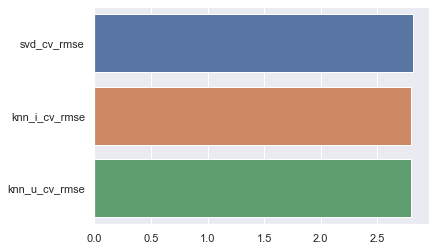

In [59]:
# Comparison of RMSE scores
sns.barplot(y=['svd_cv_rmse','knn_i_cv_rmse', 'knn_u_cv_rmse'],x=[svd_cv['test_rmse'].mean(),knn_i_cv['test_rmse'].mean(), knn_u_cv['test_rmse'].mean()])

### 10.In what business scenario you should use popularity based Recommendation Systems ?

Popularity based recommendation systems can be used in different scenarios:<br>
. When a new user enters you have no info about their past data. Here we can initiate the popularity based recommendation system.<br>
. Sometimes it is required to provide recommendation about an item that is popular, here this system comes into use.<br>
eg. Most trending video on youtube, most popoular movie etc<br>


### 11.In what business scenario you should use CF based Recommendation Systems ?

Collaberative filtering are the most used.<br>
. CF based recommendation system is useful when the past data is available. This is usually done when someone is already a user to the system where their history or search patterns is available.<br>
eg. When we login to amazon prime it give movie recommendation based on our past data.

### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

We have mentioned about CF and popularity based recommendation systems. But these two could not meet our needs at every scenario, so a mixed version might be great of  use such as Hybrid recommendation methods, Demographic, Knowledge based and Utility based recommendation systems.